# Comparing KMeans and DBSCAN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')
blobs

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
...,...,...
1495,0.882673,-6.786272
1496,0.946854,-7.254512
1497,3.180138,6.608660
1498,5.454552,6.461246


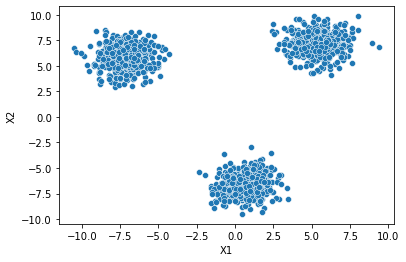

In [4]:
sns.scatterplot(data=blobs,x='X1',y='X2');

In [5]:
moons = pd.read_csv('../DATA/cluster_moons.csv')
moons

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


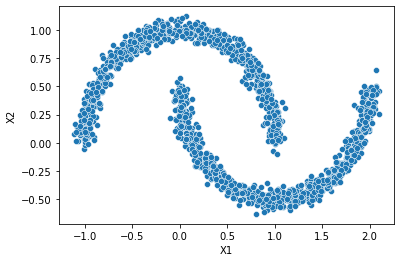

In [6]:
sns.scatterplot(data=moons,x='X1',y='X2');

In [7]:
circles = pd.read_csv('../DATA/cluster_circles.csv')
circles

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354
...,...,...
1495,-0.297506,0.077834
1496,0.082555,-0.270371
1497,0.279533,-0.109435
1498,0.027432,-0.264891


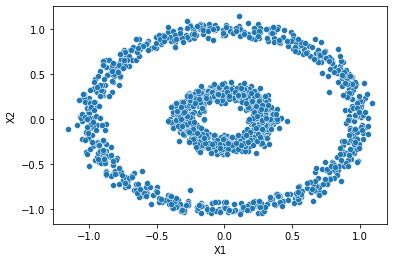

In [9]:
sns.scatterplot(data=circles,x='X1',y='X2');

In [11]:
def display_category(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

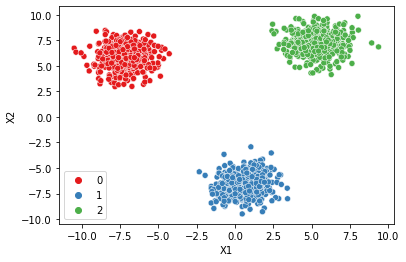

In [13]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

display_category(model,blobs)

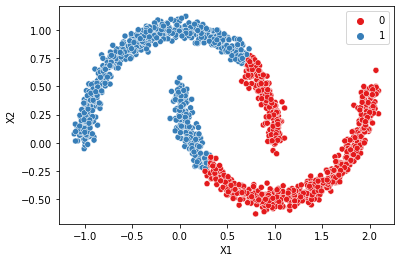

In [14]:
model = KMeans(n_clusters=2)

display_category(model,moons)

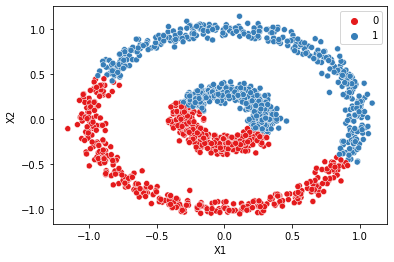

In [15]:
model = KMeans(n_clusters=2)

display_category(model,circles)

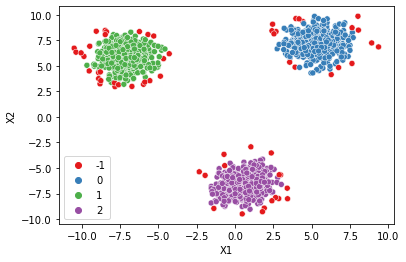

In [17]:
from sklearn.cluster import DBSCAN

model = DBSCAN()

display_category(model,blobs)

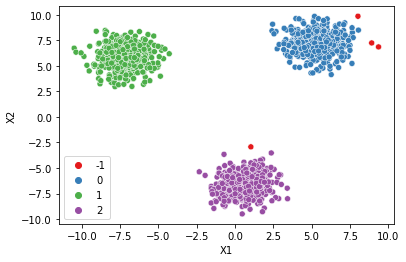

In [18]:
model = DBSCAN(eps=1)

display_category(model,blobs)

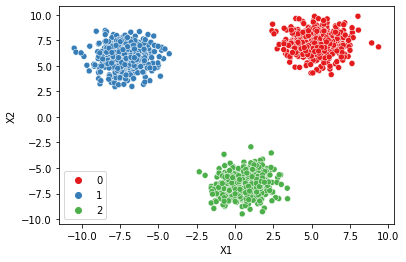

In [19]:
model = DBSCAN(eps=1.5)

display_category(model,blobs)

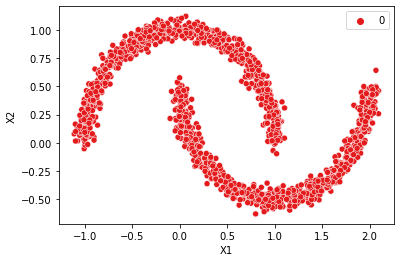

In [22]:
model = DBSCAN()

display_category(model,moons)

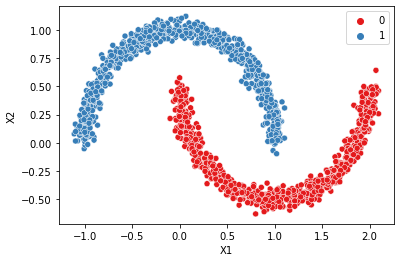

In [30]:
model = DBSCAN(eps=0.27)

display_category(model,moons)

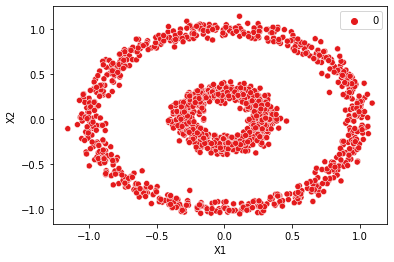

In [31]:
model = DBSCAN()

display_category(model,circles)

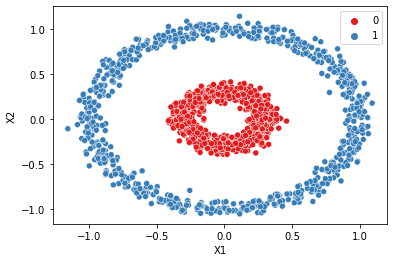

In [41]:
model = DBSCAN(eps=0.42)

display_category(model,circles)

## Setting DBSCAN Hyperparameters

In [43]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')
two_blobs

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
998,0.954444,0.889178
999,-8.867767,-5.635758
1000,-4.000000,-2.000000
1001,0.000000,-8.000000


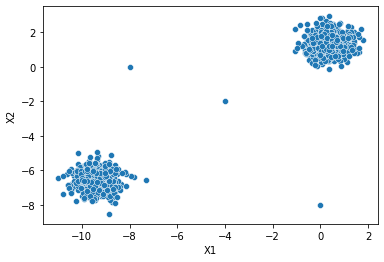

In [45]:
sns.scatterplot(data=two_blobs,x='X1',y='X2');

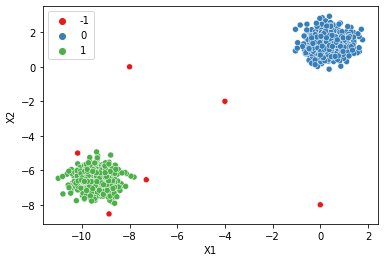

In [49]:
dbscan = DBSCAN()

display_category(dbscan,two_blobs)

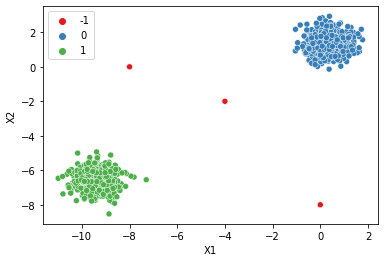

In [50]:
dbscan = DBSCAN(eps=1)

display_category(dbscan,two_blobs)

In [52]:
# Total outliers found
np.sum(dbscan.labels_ == -1)

3

In [56]:
# Checking the percentage of outliers in dataset
print(f'The total number of points is {len(dbscan.labels_)} and the percentage of outliers is {np.round(100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_),2)}%')

The total number of points is 1003 and the percentage of outliers is 0.3%


In [84]:
# Testing different values for epsilon
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,7,200):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs)
    
    #total outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    #outlier percentage
    outlier_percent.append(100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_))

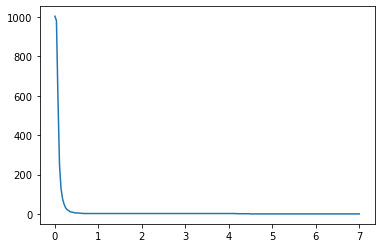

In [89]:
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outliers);

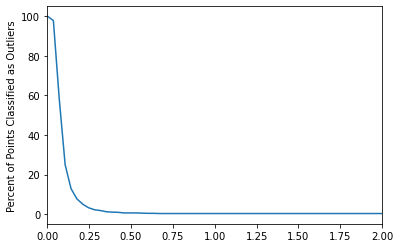

In [92]:
sns.lineplot(x=np.linspace(0.001,7,200),y=outlier_percent)
plt.xlim(0,2)
plt.ylabel('Percent of Points Classified as Outliers');
# the curve looks exactly the same shape as that plotted above

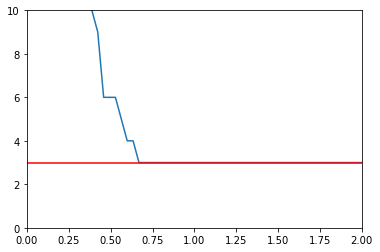

In [91]:
# One approach to see exctly where the curve stabilize
sns.lineplot(x=np.linspace(0.001,7,200),y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red');

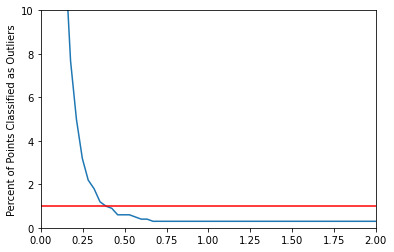

In [93]:
sns.lineplot(x=np.linspace(0.001,7,200),y=outlier_percent)
plt.xlim(0,2)
plt.ylim(0,10)
plt.ylabel('Percent of Points Classified as Outliers');
plt.hlines(y=1,xmin=0,xmax=2,color='red');

In [94]:
# Testing different values for min_samples
outlier_percent = []
number_of_outliers = []

for n in np.arange(1,100):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs)
    
    #total outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    #outlier percentage
    outlier_percent.append(100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_))

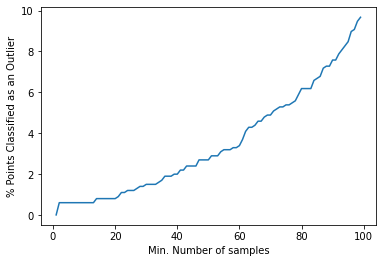

In [97]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)
plt.xlabel('Min. Number of samples')
plt.ylabel('% Points Classified as an Outlier');

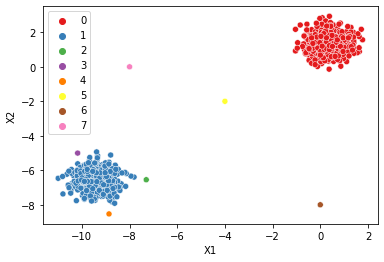

In [98]:
# playing arround n_samples
dbscan = DBSCAN(min_samples=1)

display_category(dbscan,two_blobs)

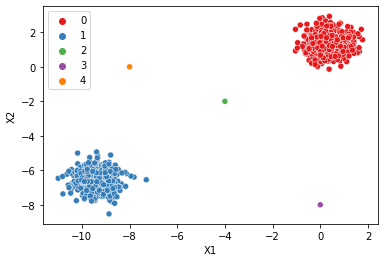

In [102]:
# When we choose number of samples equal to 1 the method will nerver find outliers
dbscan = DBSCAN(min_samples=1, eps=1)

display_category(dbscan,two_blobs)

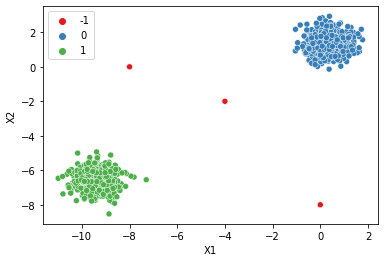

In [103]:
dbscan = DBSCAN(eps=1)

display_category(dbscan,two_blobs)